In [35]:
from preprocessing import preprocess_pipeline
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# 이상치 데이터 평가
anomaly_file_path = "학습데이터.csv"
seq_length = 10

In [37]:
# 데이터 전처리
X_anomaly = preprocess_pipeline(anomaly_file_path, seq_length)
print(f"Preprocessed anomaly data shape: {X_anomaly.shape}")

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Preprocessed anomaly data shape: (122133, 10, 15)


In [38]:
# 저장된 모델 로드
autoencoder = load_model('autoencoder_model.h5')

In [39]:
# 모델 입력 형식 확인 및 변환
expected_shape = autoencoder.input_shape[1:]
actual_shape = X_anomaly.shape[1:]

if actual_shape[1] != expected_shape[1]:
    print(f"Feature dimension mismatch: expected {expected_shape[1]}, but got {actual_shape[1]}")
    X_anomaly = X_anomaly[:, :, :expected_shape[1]]  # 필요시 차원 축소

Feature dimension mismatch: expected 7, but got 15


In [ ]:
# 모델 평가
reconstructed = autoencoder.predict(X_anomaly)
reconstruction_errors = np.mean(np.square(X_anomaly - reconstructed), axis=(1, 2))
print("Reconstruction errors calculated.")

Number of anomalies detected: 0
Reconstruction errors for detected anomalies:
[]


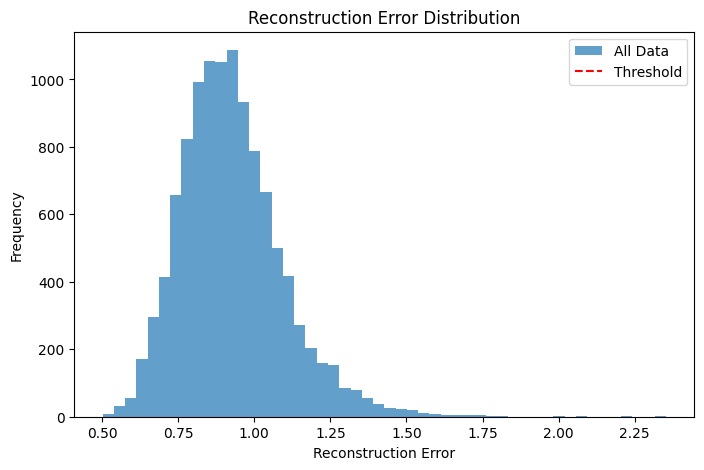

In [ ]:
# 이상치 탐지
threshold = np.mean(reconstruction_errors) + np.std(reconstruction_errors)
anomalies = reconstruction_errors > threshold
print(f"Number of anomalies detected: {np.sum(anomalies)}")

anomaly_indices = np.where(anomalies)[0]
print(f"Reconstruction errors for detected anomalies:\n{reconstruction_errors[anomaly_indices]}")

plt.figure(figsize=(8, 5))
plt.hist(reconstruction_errors, bins=50, alpha=0.7, label="All Data")
plt.axvline(threshold, color="red", linestyle="--", label="Threshold")
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()